In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster              #Hierarchical clustering
from sklearn.cluster import KMeans                                             #KMeans clustering
from sklearn.preprocessing import StandardScaler                               #Z-score scaling
from sklearn.metrics import silhouette_samples, silhouette_score               #CLuster evaluation technique
from sklearn.tree import DecisionTreeClassifier                                #Decision tree classifier
from sklearn.ensemble import RandomForestClassifier                            #Random forest classifier
from sklearn.neural_network import MLPClassifier                               #Neural network
from sklearn import tree
from sklearn.model_selection import train_test_split                           #Train-test split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve #Model Evaluation technique
from sklearn.model_selection import GridSearchCV                               #Grid search cross validation

%matplotlib inline              

# Remove warnings

import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'rcParams' from 'matplotlib' (C:\Users\aksha\AppData\Roaming\Python\Python37\site-packages\matplotlib\__init__.py)

<u id='Problem 1 - Clustering'></u>

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black"> <u> Problem 1 - Clustering
    
<font color=darkblue>A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.
 </font> 

<b> 1.1 Read the data and do exploratory data analysis. Describe the data briefly. </b>

In [2]:
#Import the dataset
bank = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
bank.head(5) #Head of the dataset

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
# Shape of the dataset
print('There are ',bank.shape[0],' rows and ',bank.shape[1],' columns in the dataset.' )

There are  210  rows and  7  columns in the dataset.


In [5]:
bank.info() #Information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
bank.describe() #Summary statistics of the dataset

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [6]:
# Check for duplicate records
dup = bank.duplicated()
dup.sum()

0

In [7]:
#Missing values check
bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

<b> Converting the columns back to the original scale in order for better interpretation and comparison. </b>

    spending: Amount spent by the customer per month (in 1000s) 
    advance_payments: Amount paid by the customer in advance by cash (in 100s)
    probability_of_full_payment: Probability of payment done in full by the customer to the bank
    current_balance: Balance amount left in the account to make purchases (in 1000s)
    credit_limit: Limit of the amount in credit card (10000s)
    min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
    max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [8]:
bank['spending'] = bank['spending'] * 1000
bank['advance_payments'] = bank['advance_payments'] *100
bank['current_balance'] = bank['current_balance'] *1000
bank['credit_limit'] = bank['credit_limit'] * 10000
bank['min_payment_amt'] = bank['min_payment_amt'] * 100
bank['max_spent_in_single_shopping'] = bank['max_spent_in_single_shopping'] * 1000

In [9]:
bank.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13890.0,1402.0,0.8880,5439.0,31990.0,398.6,4738.0
206,16770.0,1562.0,0.8638,5927.0,34380.0,492.0,5795.0
207,14030.0,1416.0,0.8796,5438.0,32010.0,171.7,5001.0
208,16120.0,1500.0,0.9000,5709.0,34850.0,227.0,5443.0
209,15570.0,1515.0,0.8527,5920.0,32310.0,264.0,5879.0


In [10]:
bank.describe() #Summary statistics of the dataset

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14847.523810,1455.928571,0.870999,5628.533333,32586.047619,370.020095,5408.071429
std,2909.699431,130.595873,0.023629,443.063478,3777.144449,150.355713,491.480499
min,10590.000000,1241.000000,0.808100,4899.000000,26300.000000,76.510000,4519.000000
25%,12270.000000,1345.000000,0.856900,5262.250000,29440.000000,256.150000,5045.000000
50%,14355.000000,1432.000000,0.873450,5523.500000,32370.000000,359.900000,5223.000000
75%,17305.000000,1571.500000,0.887775,5979.750000,35617.500000,476.875000,5877.000000
max,21180.000000,1725.000000,0.918300,6675.000000,40330.000000,845.600000,6550.000000


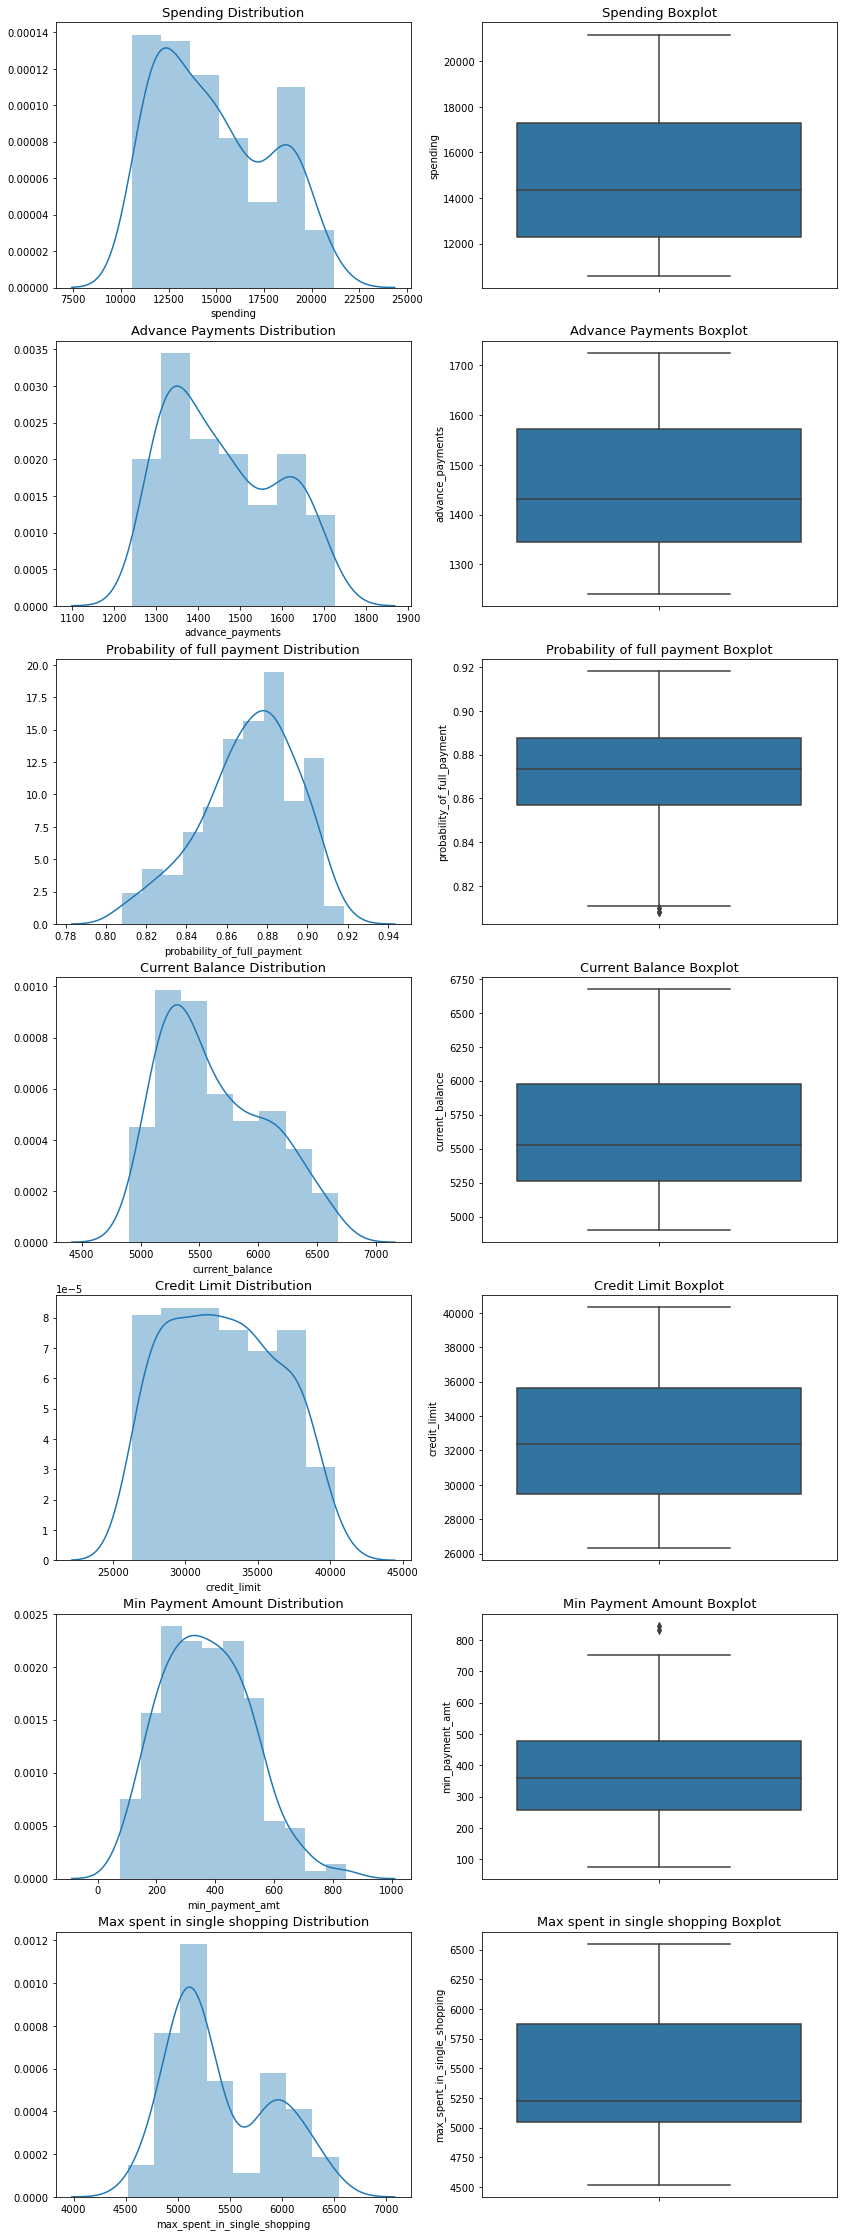

In [11]:
## Univariate Analysis

fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(14, 40)

a = sns.distplot(bank['spending'] , ax=axes[0][0])
a.set_title("Spending Distribution",fontsize=13)
a = sns.boxplot(bank['spending'] , orient = "v" , ax=axes[0][1])
a.set_title("Spending Boxplot",fontsize=13)

a = sns.distplot(bank['advance_payments'] , ax=axes[1][0])
a.set_title("Advance Payments Distribution",fontsize=13)
a = sns.boxplot(bank['advance_payments'] , orient = "v" , ax=axes[1][1])
a.set_title("Advance Payments Boxplot",fontsize=13)

a = sns.distplot(bank['probability_of_full_payment'], ax=axes[2][0])
a.set_title("Probability of full payment Distribution",fontsize=13)
a = sns.boxplot(bank['probability_of_full_payment'], orient = "v" , ax=axes[2][1])
a.set_title("Probability of full payment Boxplot",fontsize=13)

a = sns.distplot(bank['current_balance'] , ax=axes[3][0])
a.set_title("Current Balance Distribution",fontsize=13)
a = sns.boxplot(bank['current_balance'] , orient = "v" , ax=axes[3][1])
a.set_title("Current Balance Boxplot",fontsize=13)

a = sns.distplot(bank['credit_limit'] , ax=axes[4][0])
a.set_title("Credit Limit Distribution",fontsize=13)
a = sns.boxplot(bank['credit_limit'] , orient = "v" , ax=axes[4][1])
a.set_title("Credit Limit Boxplot",fontsize=13)

a = sns.distplot(bank['min_payment_amt'] , ax=axes[5][0])
a.set_title("Min Payment Amount Distribution",fontsize=13)
a = sns.boxplot(bank['min_payment_amt'] , orient = "v" , ax=axes[5][1])
a.set_title("Min Payment Amount Boxplot",fontsize=13)

a = sns.distplot(bank['max_spent_in_single_shopping'] , ax=axes[6][0])
a.set_title("Max spent in single shopping Distribution",fontsize=13)
a = sns.boxplot(bank['max_spent_in_single_shopping'] , orient = "v" , ax=axes[6][1])
a.set_title("Max spent in single shopping Boxplot",fontsize=13)

plt.show()


Inference of the univariate plots: 

    •	From the boxplots, other than Probability of full payment and minimum payment amount, rest of the columns have no outliers.
    •	Credit limit variable almost follows a uniform distribution.
    •	Spending and Advance payments distribution follows normal distribution.
    •	Current balance, probability of full payment and minimum payment amount has some skewness present.


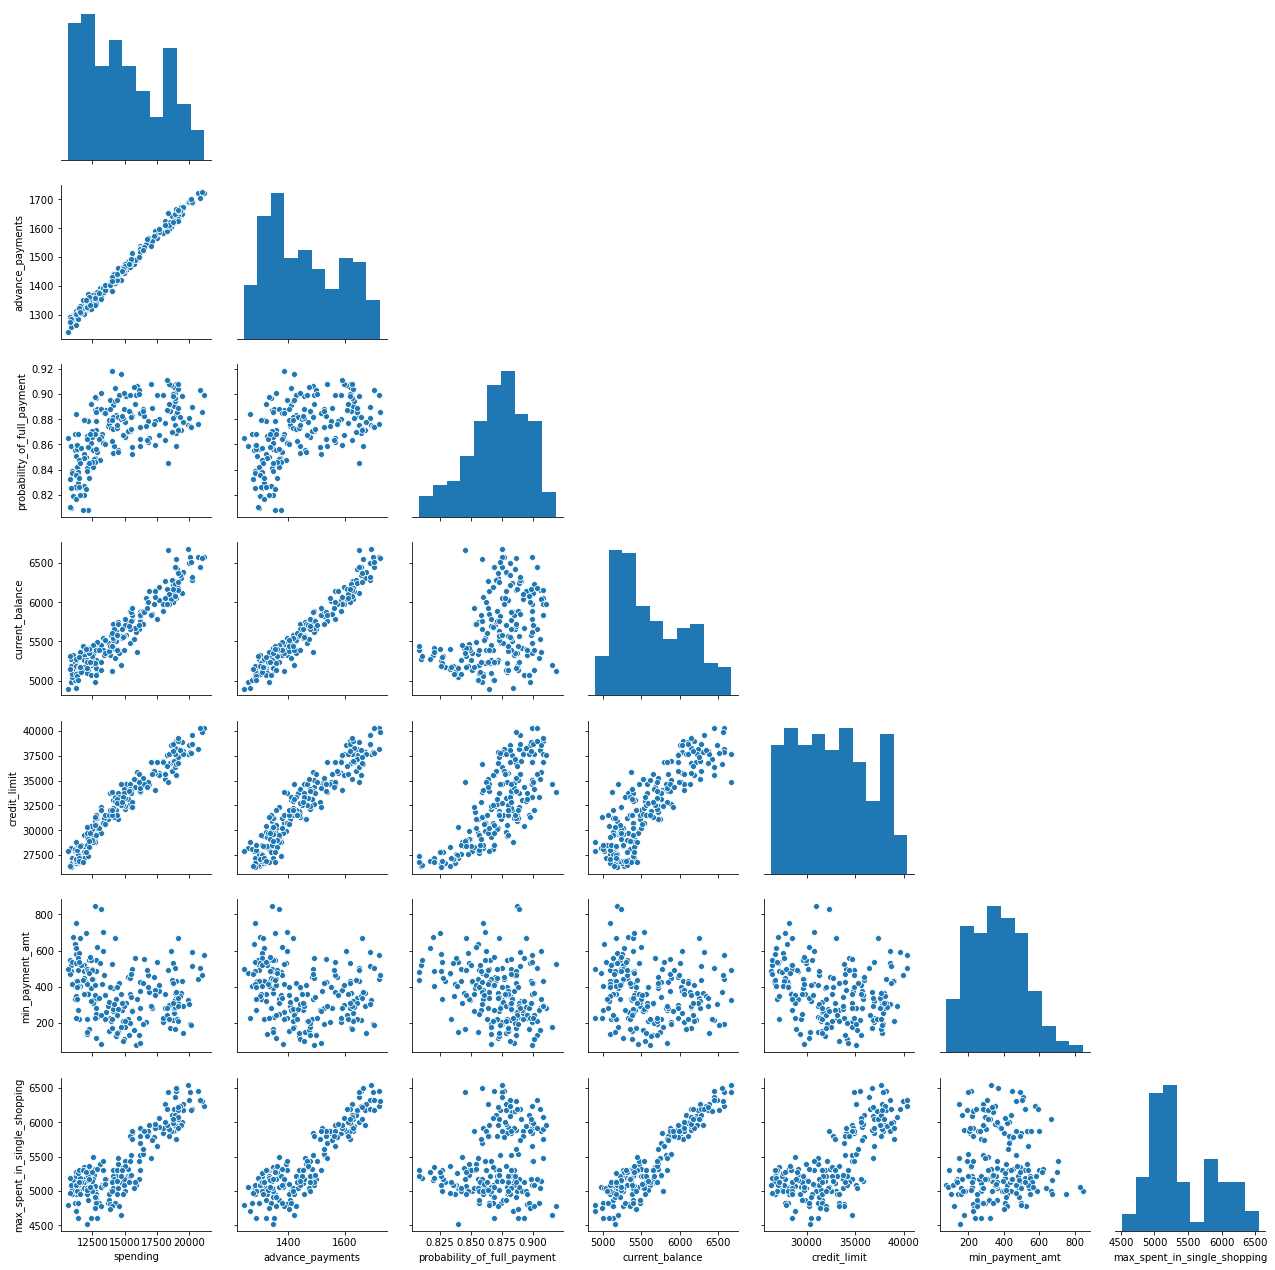

In [12]:
#Bivariate analysis

sns.pairplot(bank,corner = True);

Inference: We could infer from above plot that there exists linear relationship between some of the columns like,

    •	Spending with advance payments, current balance and credit limit.
    •	Advance payments with current balance and credit limit.
    •	Current balance also follows some kind of linear relationship with maximum amount spent in single shopping.


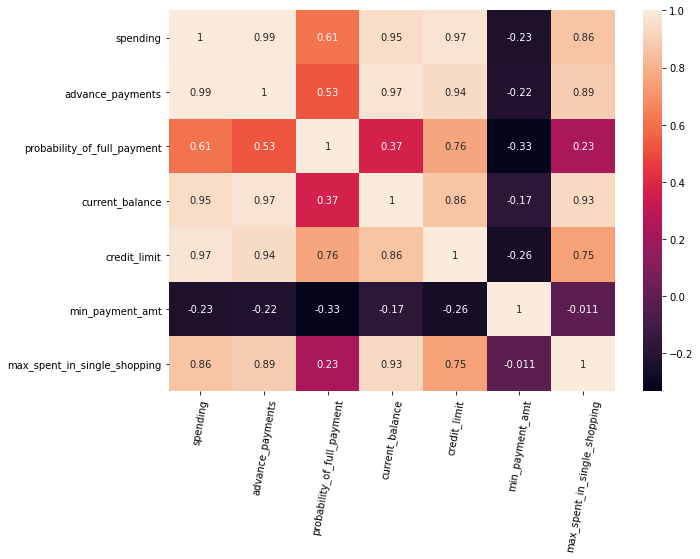

In [18]:
#Checking the correlation between variables\

corr = bank.corr()
plt.figure(figsize =(10,7))
sns.heatmap(corr, annot = True);
plt.xticks(rotation = 80);

<b> 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [19]:
sc = StandardScaler()  #Assigning standard scaler function to sc
scaled_bank = sc.fit_transform(bank)
scaled_bank #Output is an array of scaled data

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [20]:
bank_df = pd.DataFrame(scaled_bank, columns = bank.columns)
bank_df     #Scaled dataframe

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


In [21]:
bank_df.describe() #Summary statistics of the scaled dataset

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,1.340198e-16,7.602384e-16,1.260896e-15,-9.886272e-16,1.799486e-16,8.617445e-17,2.955308e-16
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


Standardisation/Scaling is an important step of Data pre-processing. It controls the variability in the dataset. In the given bank dataset, we have columns which are different in magnitude like 100s, 1000s, 10000s (even though they are all measured in same units except probability of full payment). 

Distance-based algorithms like clustering and K-means are very likely to be affected by scaling. The algorithm needs to calculate distance between the rows. 

If the magnitude of variables in the dataset differ by large amounts, then the result of the distance measure is likely to be biased and move towards the variable which represents greater magnitude which in-turn suppresses other variables that might be of importance.

In order to offset this effect, Scaling is done to give equal considerations for each variable/feature. It converts data into specific range using a linear transformation which generates good quality clusters and improves the accuracy of clustering algorithms.


<b> 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

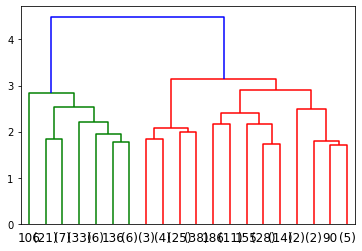

In [22]:
#Dendrogram for Average linkage method
link_average = linkage(bank_df, method = 'average')
dend_average = dendrogram(link_average, p=20, truncate_mode ='lastp')

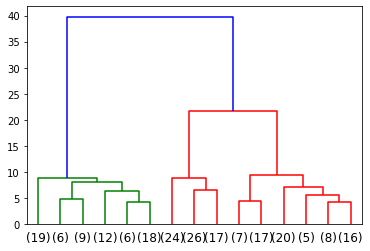

In [23]:
#Dendrogram for wards linkage method
link_ward = linkage(bank_df, method = 'ward')
dend_ward = dendrogram(link_ward, p =15, truncate_mode = 'lastp')

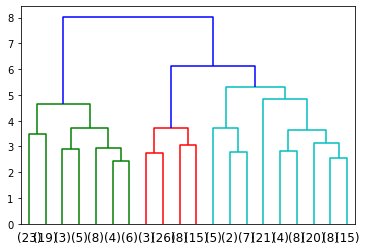

In [38]:
#Dendrogram for complete linkage method
link_com = linkage(bank_df, method = 'complete')
dend_com = dendrogram(link_com, p =20, truncate_mode = 'lastp')

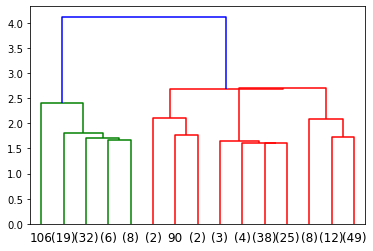

In [33]:
#Dendrogram for centroid linkage method
link_cen = linkage(bank_df, method = 'centroid')
dend_cen = dendrogram(link_cen, p =15, truncate_mode = 'lastp')

In [25]:
#Clusters obtained using average linkage method
cluster_avg = fcluster(link_average,3,criterion = 'maxclust')
cluster_avg

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [26]:
#Clusters obtained using wards linkage method
cluster_ward = fcluster(link_ward,3,criterion = 'maxclust')
cluster_ward

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [27]:
#Clusters obtained using complete linkage method
cluster_com = fcluster(link_com,3,criterion = 'maxclust')
cluster_com

array([1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 1, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 1, 1,
       1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       1, 2, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 1, 2, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 2, 2, 3, 1, 3, 1, 2, 2, 1], dtype=int32)

In [41]:
bank_hc = bank.copy() #Creating a copy of original bank dataset
bank_hc['cluster_comp'] = cluster_com #Adding clusters to the dataset
bank_hc

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_comp
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,2
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,1
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,3
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,1
...,...,...,...,...,...,...,...,...
205,13890.0,1402.0,0.8880,5439.0,31990.0,398.6,4738.0,3
206,16770.0,1562.0,0.8638,5927.0,34380.0,492.0,5795.0,1
207,14030.0,1416.0,0.8796,5438.0,32010.0,171.7,5001.0,2
208,16120.0,1500.0,0.9000,5709.0,34850.0,227.0,5443.0,2


In [42]:
#Creating cluster profiles
clust_profile1=bank_hc.groupby('cluster_comp').mean()
clust_profile1['freq']=bank_hc['cluster_comp'].value_counts().sort_index()
clust_profile1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
cluster_comp,,,,,,,,
1,18394.264706,1616.970588,0.882696,6172.500000,36793.382353,365.182353,6038.176471,68
2,14892.500000,1455.615385,0.882604,5589.230769,33190.961538,247.494423,5192.903846,52
3,12141.777778,1334.433333,0.855456,5240.244444,29057.666667,444.467889,5056.311111,90


In [51]:
clust_profile1['clust_prop'] = (clust_profile1.freq / 210) *100
clust_profile1[['freq','clust_prop']]

,freq,clust_prop
cluster_comp,,
1,68,32.380952
2,52,24.761905
3,90,42.857143


In [43]:
bank_hc.to_csv('bank_hc.csv')

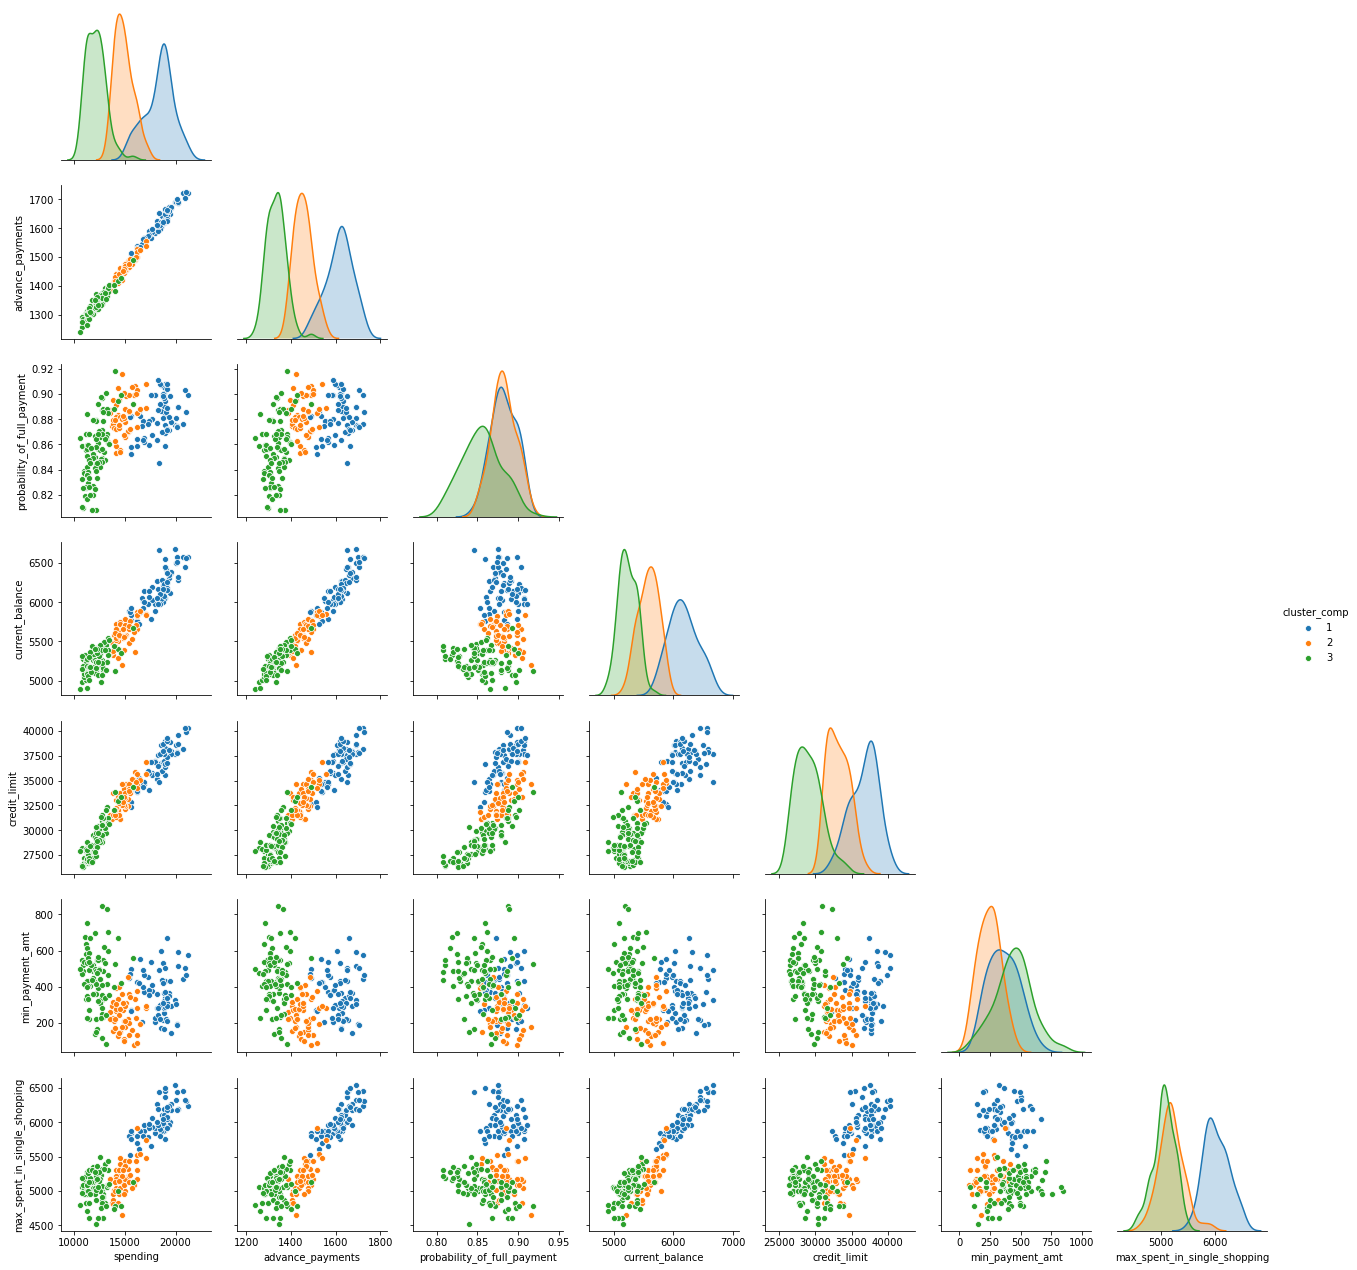

In [44]:
#Pairplot
sns.pairplot(bank_hc, hue ='cluster_comp', corner = True);

<b> 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

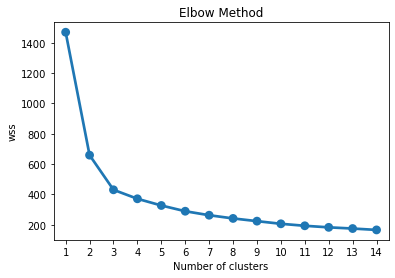

In [79]:
#Using the elbow method to find the optimum number of clusters
wss = []
for i in range(1,15):
    km=KMeans(n_clusters=i, random_state=1)
    km.fit(bank_df)
    wss.append(km.inertia_)
sns.pointplot(np.arange(1,15),wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wss')
plt.show()

In [80]:
wss = pd.DataFrame(wss)
wss

,0
0,1470.000000
1,659.171754
2,430.658973
3,371.385091
4,327.212782
5,289.315995
6,262.981866
7,241.818947
8,223.912542
9,206.396122


In [82]:
#K-means sil score and sil width for 2 cluster
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(bank_df)
label_2 = k_means.labels_
print('Kmeans with 2 clusters')
print('SIL score: ',(silhouette_score(bank_df,label_2)).round(2))
print('SIL width minimum: ', (silhouette_samples(bank_df,label_2).min()).round(3))

Kmeans with 2 clusters
SIL score:  0.47
SIL width minimum:  -0.006


In [83]:
#K-means sil score and sil width for 3 cluster
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(bank_df)
label_3 = k_means.labels_
print('Kmeans with 3 clusters')
print('SIL score: ',(silhouette_score(bank_df,label_3)).round(2))
print('SIL width minimum: ', (silhouette_samples(bank_df,label_3).min()).round(3))

Kmeans with 3 clusters
SIL score:  0.4
SIL width minimum:  0.003


In [84]:
#K-means sil score and sil width for 4 cluster
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(bank_df)
label_4 = k_means.labels_
print('Kmeans with 4 clusters')
print('SIL score: ',(silhouette_score(bank_df,label_4)).round(2))
print('SIL width minimum: ', (silhouette_samples(bank_df,label_4).min()).round(3))

Kmeans with 4 clusters
SIL score:  0.33
SIL width minimum:  -0.054


In [85]:
#K-means sil score and sil width for 5 cluster
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(bank_df)
label_5 = k_means.labels_
print('Kmeans with 5 clusters')
print('SIL score: ',(silhouette_score(bank_df,label_5)).round(2))
print('SIL width minimum: ', (silhouette_samples(bank_df,label_5).min()).round(3))

Kmeans with 5 clusters
SIL score:  0.28
SIL width minimum:  -0.048


In [86]:
#Extracting the labels for 3 clusters
label_3

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [87]:
bank_Kmeans = bank.copy()

In [88]:
bank_Kmeans['Labels'] = label_3
bank_Kmeans

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Labels
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,2
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,0
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,2
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,1
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,2
...,...,...,...,...,...,...,...,...
205,13890.0,1402.0,0.8880,5439.0,31990.0,398.6,4738.0,0
206,16770.0,1562.0,0.8638,5927.0,34380.0,492.0,5795.0,2
207,14030.0,1416.0,0.8796,5438.0,32010.0,171.7,5001.0,0
208,16120.0,1500.0,0.9000,5709.0,34850.0,227.0,5443.0,0


In [89]:
clust_profile=bank_Kmeans.groupby('Labels').mean()
clust_profile['freq']=bank_Kmeans.Labels.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Labels,,,,,,,,
0,14437.887324,1433.774648,0.881597,5514.577465,32592.253521,270.734085,5120.802817,71
1,11856.944444,1324.777778,0.848253,5231.750000,28495.416667,474.238889,5101.722222,72
2,18495.373134,1620.343284,0.884210,6175.686567,36975.373134,363.237313,6041.701493,67


In [90]:
clust_profile['clust_prop'] = (clust_profile.freq / 210) *100
clust_profile[['freq','clust_prop']]

,freq,clust_prop
Labels,,
0,71,33.809524
1,72,34.285714
2,67,31.904762


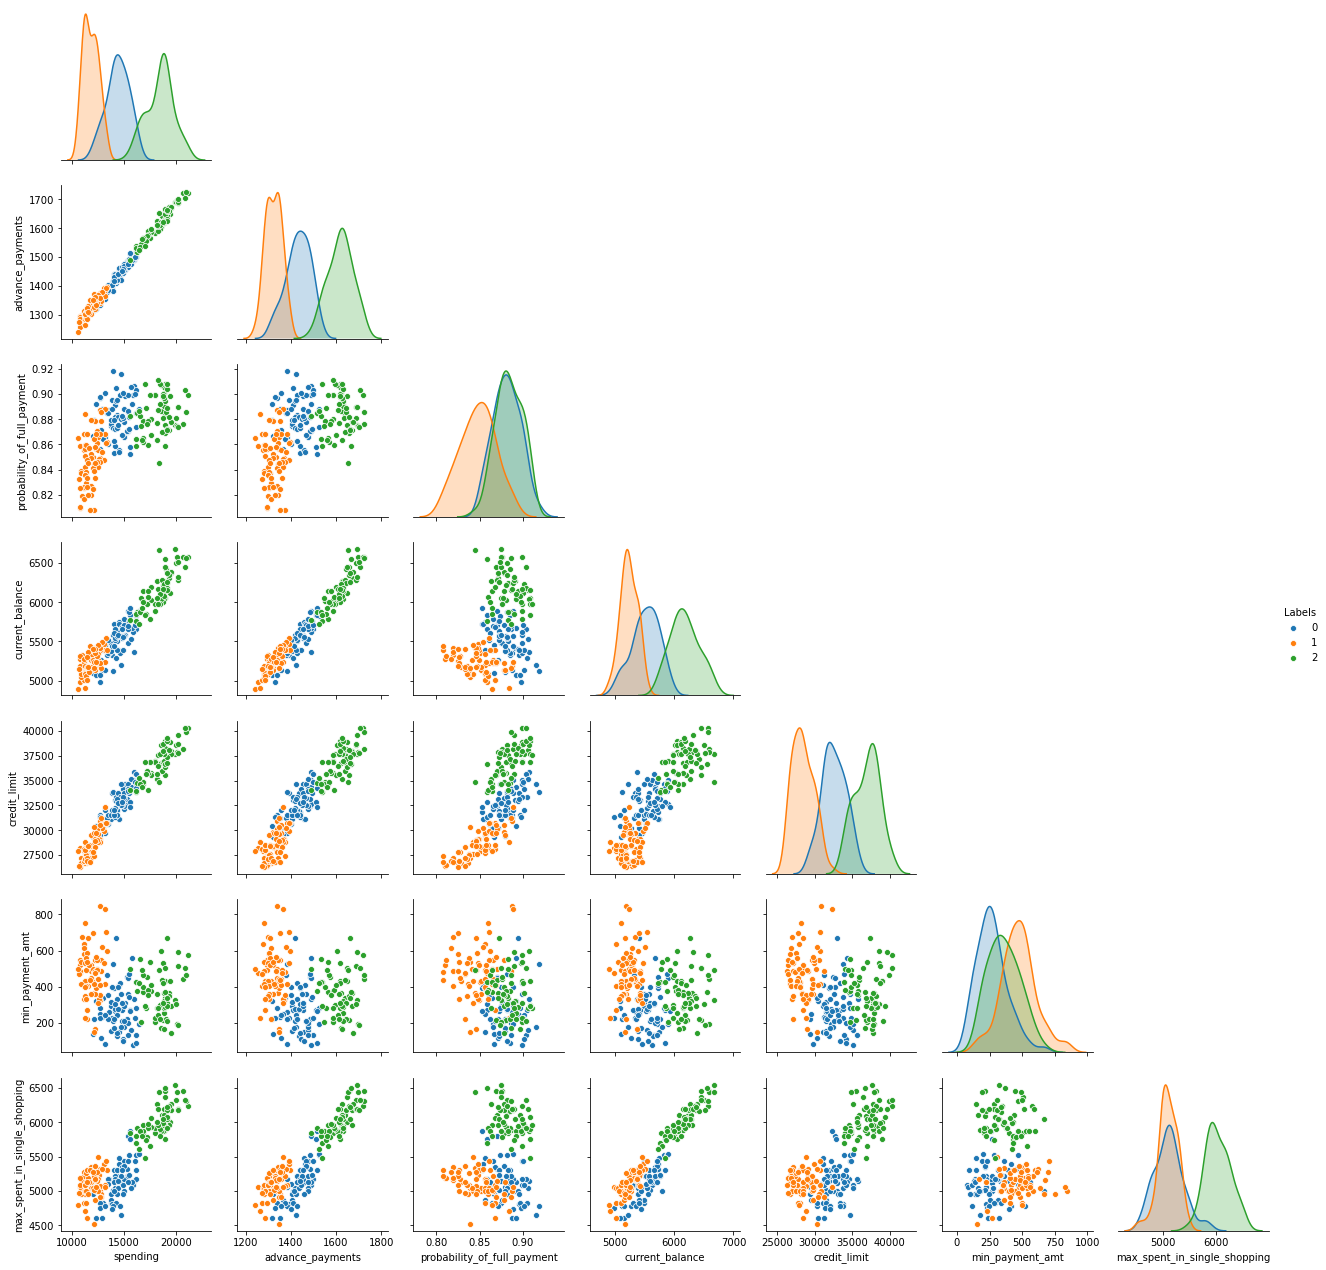

In [91]:
sns.pairplot(bank_Kmeans,hue = 'Labels', corner = True);

In [92]:
bank_Kmeans.to_csv('bank_kmeans.csv')

<b> 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Both the models provide more or less the same output based on the clusters for the given dataset. Hence, we have come up with three categories of users.

    Cluster 1: Customers with high spending, advance payments, current balance, credit limit, max spent in single shopping and medium min payment amount. These customers are typically of high value based on their spending pattern and credit limit. Probability of full payment is also 0.88 for this segment of customers, which means there is more than likely percentage of chance that these customers will pay the entire due amount. This is the wealthiest segment that has approximately 32% of customers.
    
    Cluster 2: Customers with moderate spending, advance payments, current balance, credit limit, max spent in single shopping and low minimum payment amount. Customers in this cluster keep their spending in check with respect to the credit limit. They tend to not spend enough in spite of their credit limit and also, they make 10% advance payments with respect to their spending. Further analysis could be required in order in order to determine the low min payment amount. In hierarchical clustering, this group contains 24% of customers and through k-means clustering we could see that 33% of the customers belong to this cluster.
    
    Cluster 3: Customers with low spending, advance payments, current balance, credit limit, max spent in single shopping and high minimum payment amount. Customers in this cluster could belong to people who might have just started their career or people who are self-aware avoiders of credit cards because of the high minimum payment amount. Through k-means clustering, we get 34% of customers in this cluster and by hierarchical clustering, this is cluster which contains maximum number of customers, approximately 42%.


**Promotional Offers**
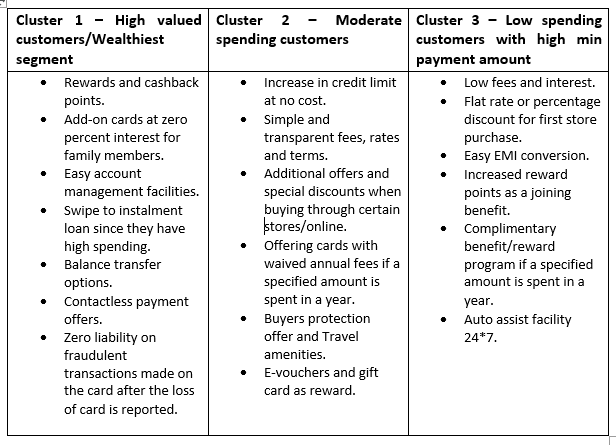

<u id='Problem 2 - CART/RT/ANN'></u>

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black"> <u> Problem 2 - CART/RF/ANN
    
<font color=darkblue>An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.
 </font> 

<b> 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [140]:
# Import the dataset

claim = pd.read_csv('insurance_part2_data.csv')

In [141]:
claim.head(5) #Head of the dataset

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [142]:
# Shape of the dataset
print('There are ',claim.shape[0],' rows and ',claim.shape[1],' columns in the dataset.' )

There are  3000  rows and  10  columns in the dataset.


In [143]:
claim.info() #Information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [144]:
claim.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [145]:
num =[] #Summary statistics for numerical data
cat = [] #Cartegorical columns

for i in claim.columns:
    if claim[i].dtypes != 'int64' and claim[i].dtypes != 'float64':
        cat.append(i)
    else:
        num.append(i)

claim[num].describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [146]:
claim[claim['Duration'] == claim['Duration'].min()]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


In [147]:
claim[cat].describe()

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
count,3000,3000,3000,3000,3000,3000
unique,4,2,2,2,5,3
top,EPX,Travel Agency,No,Online,Customised Plan,ASIA
freq,1365,1837,2076,2954,1136,2465


In [148]:
# Check for duplicate records
dup = claim.duplicated(keep = 'first')
claim[dup]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [149]:
#Drop duplicate records and creating a new DataFrame df without duplicate records
df = claim.drop_duplicates()

In [150]:
df.shape

(2861, 10)

In [151]:
df[num].describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,72.120238,61.757878
std,10.678106,25.826834,135.977200,71.399740
min,8.000000,0.000000,-1.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,4580.000000,539.000000


In [152]:
df[cat].describe()

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
count,2861,2861,2861,2861,2861,2861
unique,4,2,2,2,5,3
top,EPX,Travel Agency,No,Online,Customised Plan,ASIA
freq,1238,1709,1947,2815,1071,2327


In [153]:
#Unique values and count of unique values in each category
for column in df[cat]:
    print(column.upper(), ': ', df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     471
C2B     913
EPX    1238
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1152
Travel Agency    1709
Name: Type, dtype: int64


CLAIMED :  2
Yes     914
No     1947
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2815
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           421
Cancellation Plan     615
Bronze Plan           645
Customised Plan      1071
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     319
ASIA        2327
Name: Destination, dtype: int64




In [163]:
#Target variable proportion
print('Proportion of Yes in claimed category: ',((df['Claimed'][df['Claimed'] == 'Yes'].count() / 2861) *100).round(2))
print('Proportion of No in claimed category: ',((df['Claimed'][df['Claimed'] == 'No'].count() / 2861) *100).round(2))

Proportion of Yes in claimed category:  31.95
Proportion of No in claimed category:  68.05


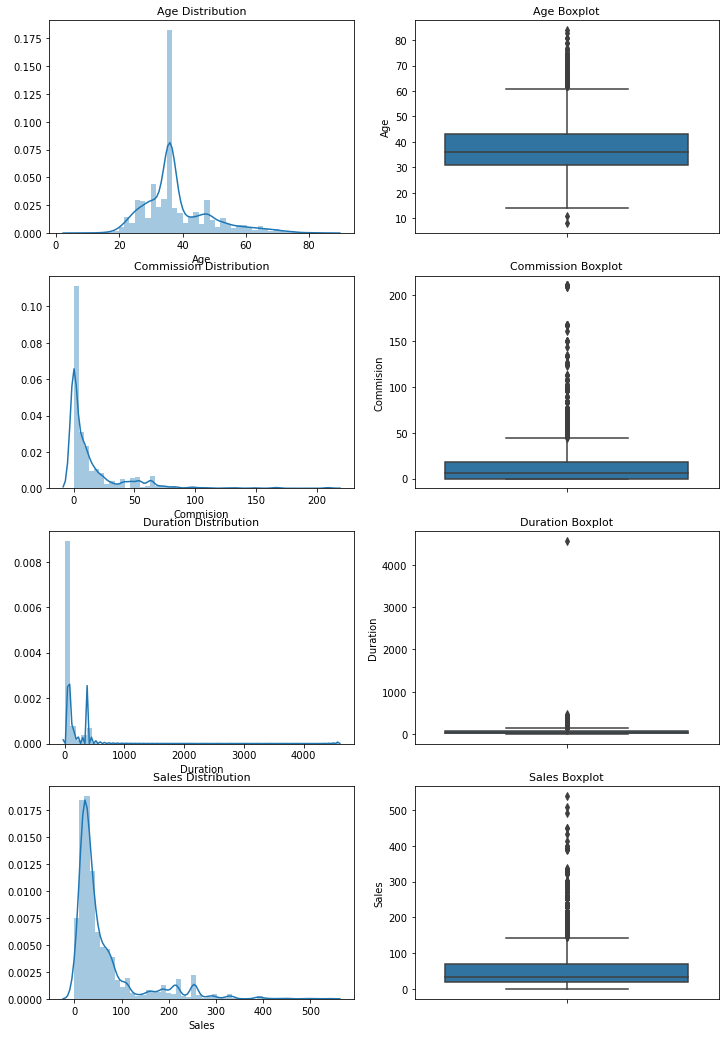

In [167]:
## Univariate Analysis

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 18)

a = sns.distplot(df.Age , ax=axes[0][0])
a.set_title("Age Distribution",fontsize=11)
a = sns.boxplot(df.Age , orient = "v" , ax=axes[0][1])
a.set_title("Age Boxplot",fontsize=11)

a = sns.distplot(df.Commision, ax=axes[1][0])
a.set_title("Commission Distribution",fontsize=11)
a = sns.boxplot(df.Commision , orient = "v" , ax=axes[1][1])
a.set_title("Commission Boxplot",fontsize=11)

a = sns.distplot(df.Duration, ax=axes[2][0])
a.set_title("Duration Distribution",fontsize=11)
a = sns.boxplot(df.Duration, orient = "v" , ax=axes[2][1])
a.set_title("Duration Boxplot",fontsize=11)

a = sns.distplot(df.Sales , ax=axes[3][0])
a.set_title("Sales Distribution",fontsize=11)
a = sns.boxplot(df.Sales , orient = "v" , ax=axes[3][1])
a.set_title("Sales Boxplot",fontsize=11)
plt.show()

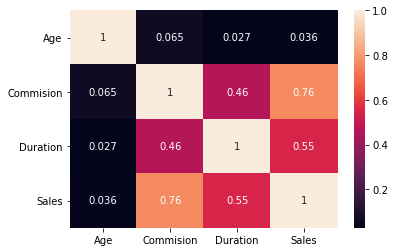

In [168]:
## Bivariate analysis

corr = df.corr()
plt.figure(figsize = (6,4))
sns.heatmap(corr, annot = True);

In [169]:
# Create a copy of the dataset df(without duplicates)
claim_c = df.copy()

In [170]:
# Before scaling the variable, the dataset should be devoid of outliers. In order to do this, a custom function is defined which
# returns two output for a particular column if the value is greater than the maximum value or less than the minimum value.

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [171]:
# Loop the above functions for all the columns

for i in num:
    lr, ur = remove_outlier(claim_c[i])
    claim_c[i] = np.where(claim_c[i] > ur, ur, claim_c[i])
    claim_c[i] = np.where(claim_c[i] < lr, lr, claim_c[i])

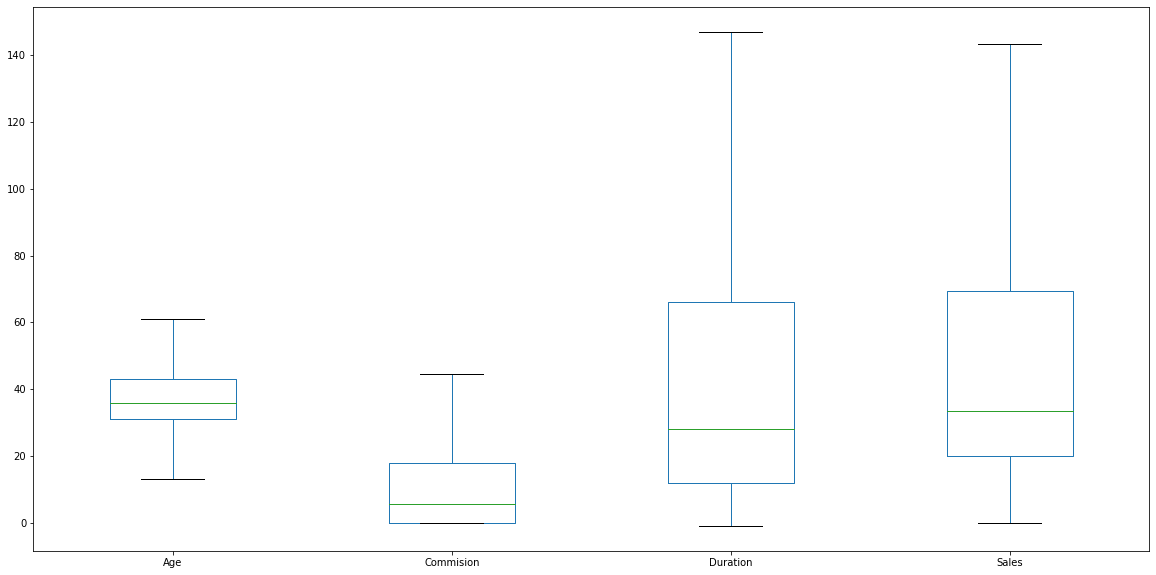

In [172]:
# Boxplot after the outlier removal
claim_c.plot(kind = 'box', figsize = (20,10));

# All of the outliers in the columns are removed using IQR outlier treatment method

In [173]:
claim_c.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,C2B,Airlines,No,0.70,Online,7.0,2.51,Customised Plan,ASIA
1,36.0,EPX,Travel Agency,No,0.00,Online,34.0,20.00,Customised Plan,ASIA
2,39.0,CWT,Travel Agency,No,5.94,Online,3.0,9.90,Customised Plan,Americas
3,36.0,EPX,Travel Agency,No,0.00,Online,4.0,26.00,Cancellation Plan,ASIA
4,33.0,JZI,Airlines,No,6.30,Online,53.0,18.00,Bronze Plan,ASIA


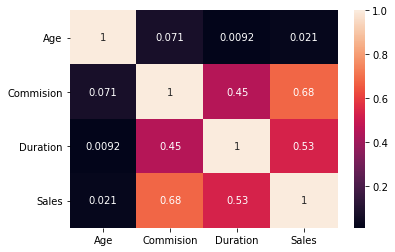

In [174]:
## Bivariate analysis

corr = claim_c.corr()
plt.figure(figsize = (6,4))
sns.heatmap(corr, annot = True);

In [175]:
# Converting all objects to categorical column for claim_c dataset which has no duplicates and outliers

for cat in claim_c.columns:
    if claim_c[cat].dtype == 'object':
        print('\n')
        print('Feature : ', cat)
        print(pd.Categorical(claim_c[cat].unique()))
        print(pd.Categorical(claim_c[cat].unique()).codes)
        claim_c[cat] = pd.Categorical(claim_c[cat]).codes



Feature :  Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


Feature :  Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


Feature :  Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


Feature :  Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


Feature :  Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


Feature :  Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [176]:
# Converting all objects to categorical column for df dataset which has no duplicates and outliers present

for cat in df.columns:
    if df[cat].dtype == 'object':
        print('\n')
        print('Feature : ', cat)
        print(pd.Categorical(df[cat].unique()))
        print(pd.Categorical(df[cat].unique()).codes)
        df[cat] = pd.Categorical(df[cat]).codes



Feature :  Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


Feature :  Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


Feature :  Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


Feature :  Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


Feature :  Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


Feature :  Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [177]:
claim_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   float64
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 128.5 KB


In [178]:
df.info() #dataset with outliers, no duplicates and all the columns are converted to int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 128.5 KB


In [179]:
claim_c.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


In [180]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


<b> 2.2 Data Split: Split the data into test and train (1.5 pts), build classification model CART (2 pts), Random Forest (2 pts), Artificial Neural Network(2 pts).

<b> Split the data into test and train

In [197]:
#Extracting the target columns into seperate vectors for training set and testing set
#df dataset with outliers is used for CART and RF since they are not affected by outliers
X = df.drop('Claimed', axis = 1)
y = df.pop('Claimed')

In [198]:
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [199]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claimed, dtype: int8

In [200]:
#Splitting the data into train and test

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [201]:
#Checking the dimensions of train and test
print('X train : ',X_train.shape)
print('X test : ',X_test.shape)
print('train labels : ',train_labels.shape)
print('test labels : ', test_labels.shape)

X train :  (2002, 9)
X test :  (859, 9)
train labels :  (2002,)
test labels :  (859,)


<b> Building classification model CART

In [238]:
#Creating a grid search cross validation for building decision tree

param_grid = {
    'max_depth' : [3,4,5],
    'min_samples_leaf' : [30,35,40,45,50],
    'min_samples_split' : [120,160,200,260,280]
}

cart = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
grid_search_cart = GridSearchCV(estimator = cart, param_grid = param_grid, cv = 10)

In [239]:
#Finding the best parameters for proceeding with the model
grid_search_cart.fit(X_train, train_labels)
print(grid_search_cart.best_params_)
best_grid_cart = grid_search_cart.best_estimator_
best_grid_cart #final parameters

{'max_depth': 4, 'min_samples_leaf': 35, 'min_samples_split': 160}


DecisionTreeClassifier(max_depth=4, min_samples_leaf=35, min_samples_split=160,
                       random_state=1)

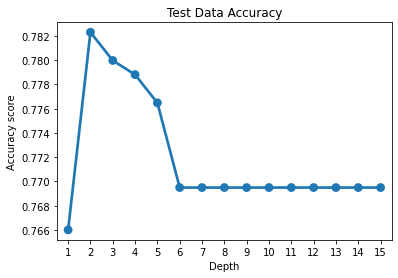

In [263]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 16))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, min_samples_leaf=35,min_samples_split = 160,
                             random_state = 1)
    clf.fit(X_train, train_labels)
    score = clf.score(X_test, test_labels) #Test data accuracy
    accuracy.append(score)

sns.pointplot(np.arange(1,16),accuracy);
plt.xlabel('Depth')
plt.ylabel('Accuracy score')
plt.title('Test Data Accuracy');

In [244]:
#Generating tree
from sklearn import tree
train_char_label = ['No','Yes']
tree1 = open('tree.dot','w')
dot_data = tree.export_graphviz(best_grid_cart, out_file = tree1, feature_names = list(X_train), class_names = list(train_char_label))
tree1.close()
dot_data

In [245]:
#Feature importance
print (pd.DataFrame(best_grid_cart.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.591170
Sales         0.300253
Product Name  0.046625
Commision     0.044628
Duration      0.017324
Age           0.000000
Type          0.000000
Channel       0.000000
Destination   0.000000


In [249]:
#Predicting on training and testing data - Output will be 1's and 0's

ytrain_predict1 = best_grid_cart.predict(X_train) #Training set
ytest_predict1 = best_grid_cart.predict(X_test) #Testing set
ytest_predict1

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [377]:
#Probability of Y = 0  and Y = 1
ytest_predict_prob1=best_grid_cart.predict_proba(X_test)
df1 = ytest_predict_prob1
pd.DataFrame(ytest_predict_prob1).head()

,0,1
0,0.375000,0.625000
1,0.932673,0.067327
2,0.274112,0.725888
3,0.714744,0.285256
4,0.714744,0.285256


In [396]:
xtest = X_test.copy()
xtest['labels'] = test_labels
xtest['predict labels'] = ytest_predict1
xtest.groupby(['Agency_Code']).sum()

,Age,Type,Commision,Channel,Duration,Sales,Product Name,Destination,labels,predict labels
Agency_Code,,,,,,,,,,
0,9934,0.0,6629.06,266.0,30270,26263.16,520.0,0.0,168.0,223.0
1,5678,140.0,5101.32,124.0,9551,8493.40,302.0,104.0,39.0,13.0
2,14372,389.0,91.00,387.0,17921,17130.20,568.0,111.0,59.0,5.0
3,2635,0.0,780.50,64.0,2874,2415.87,0.0,5.0,5.0,0.0


<b> Building Random Forest classifier

In [257]:
#Creating grid search for finding out optimal number of values for the hyper parameter

param_grid1 = {
    'max_depth': [3,4,5],
    'max_features': [5,6,7,8],
    'min_samples_leaf': [50,55,60,65],
    'min_samples_split': [180,200,220], 
    'n_estimators': [80,100,120]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid1, cv = 10)

In [258]:
#Finding the best parameters for proceeding with the model
grid_search_rfcl.fit(X_train, train_labels)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl #final parameters

{'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 60, 'min_samples_split': 180, 'n_estimators': 80}


RandomForestClassifier(max_depth=4, max_features=7, min_samples_leaf=60,
                       min_samples_split=180, n_estimators=80, random_state=1)

In [259]:
#Feature importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.502921
Sales         0.205175
Product Name  0.195036
Commision     0.055665
Duration      0.023440
Age           0.009383
Type          0.006224
Destination   0.002155
Channel       0.000000


In [264]:
#Predicting on training and testing data - Output will be 1's and 0's

ytrain_predict2 = best_grid_rfcl.predict(X_train) #Training set
ytest_predict2 = best_grid_rfcl.predict(X_test) #Testing set
ytest_predict2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [265]:
#Probability of Y = 0  and Y = 1
ytest_predict_prob2=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob2
pd.DataFrame(ytest_predict_prob2).head()

,0,1
0,0.595916,0.404084
1,0.909827,0.090173
2,0.280666,0.719334
3,0.731035,0.268965
4,0.680339,0.319661


<b> Building Artificial neural network

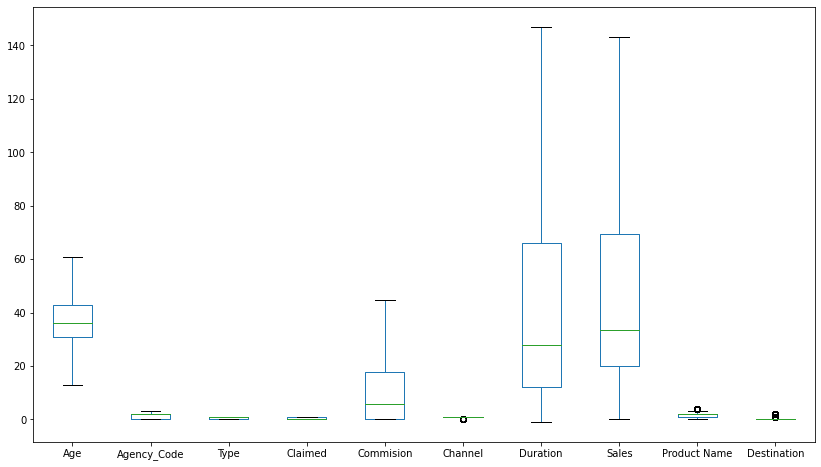

In [274]:
claim_c.plot(kind = 'box', figsize = (14,8));

In [275]:
#Extracting the target columns into seperate vectors for training set and testing set
#claim_c dataset without outliers is used for ANN since they are affected by outliers and variables should be scaled before applying the model.
X_nn = claim_c.drop('Claimed', axis = 1)
y_nn = claim_c.pop('Claimed')

In [276]:
#Train test split
X_train1, X_test1,train_labels1, test_labels1 = train_test_split(X_nn,y_nn,test_size = 0.30, random_state = 1)

In [278]:
#Checking the dimensions of train and test
print('X train for NN : ',X_train1.shape)
print('X test for NN : ',X_test1.shape)
print('train labels for NN : ',train_labels1.shape)
print('test labels fro NN : ', test_labels1.shape)

X train for NN :  (2002, 9)
X test for NN :  (859, 9)
train labels for NN :  (2002,)
test labels fro NN :  (859,)


In [283]:
#Scaling the train data
X_train1 = sc.fit_transform(X_train1)
#Apply the transformation on test data
X_test1 = sc.transform(X_test1)


In [344]:
#Creating grid search for finding out optimal number of values for the hyper parameter

param_grid2 = {
    'hidden_layer_sizes': [(100,100),(150,150)], 
    'max_iter': [500, 1000], 
    'solver': ['adam', 'sgd'], 
    'tol': [0.01,0.001],
    'activation' : ['logistic', 'relu']
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid2, cv = 5)

In [345]:
#Finding the best parameters for proceeding with the model
grid_search_nncl.fit(X_train1, train_labels1)
print(grid_search_nncl.best_params_)
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl #final parameters

{'activation': 'relu', 'hidden_layer_sizes': (100, 100), 'max_iter': 500, 'solver': 'adam', 'tol': 0.001}


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, random_state=1,
              tol=0.001)

In [346]:
#Predicting on training and testing data

ytrain_predict3 = best_grid_nncl.predict(X_train1)
ytest_predict3 = best_grid_nncl.predict(X_test1)

In [347]:
#Probability of Y = 0  and Y = 1
ytest_predict_prob3=best_grid_nncl.predict_proba(X_test1)
ytest_predict_prob3
pd.DataFrame(ytest_predict_prob3).head()

,0,1
0,0.048326,0.951674
1,0.914119,0.085881
2,0.282119,0.717881
3,0.755367,0.244633
4,0.774604,0.225396


<b>2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

<b> CART Model evaluation

In [371]:
#Accuracy score of training and testing data
cart_train_acc = accuracy_score(train_labels, ytrain_predict1)
cart_test_acc = accuracy_score(test_labels, ytest_predict1)
print('Accuracy of training data for CART: ', accuracy_score(train_labels, ytrain_predict1))
print('Accuracy of testing data for CART: ', accuracy_score(test_labels, ytest_predict1))

Accuracy of training data for CART:  0.7772227772227772
Accuracy of testing data for CART:  0.7788125727590222


In [304]:
#Confusion Matrix

print('Confusion matrix for train data : \n',confusion_matrix(train_labels, ytrain_predict1))
print('Confusion matrix for test data : \n',confusion_matrix(test_labels, ytest_predict1))

Confusion matrix for train data : 
 [[1172  187]
 [ 259  384]]
Confusion matrix for test data : 
 [[508  80]
 [110 161]]


In [306]:
#Classification report

print('Classification report for train data : \n',classification_report(train_labels, ytrain_predict1))
print('Classification report for test data : \n',classification_report(test_labels, ytest_predict1))

Classification report for train data : 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1359
           1       0.67      0.60      0.63       643

    accuracy                           0.78      2002
   macro avg       0.75      0.73      0.74      2002
weighted avg       0.77      0.78      0.77      2002

Classification report for test data : 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       588
           1       0.67      0.59      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.77      0.78      0.78       859



AUC: 0.807


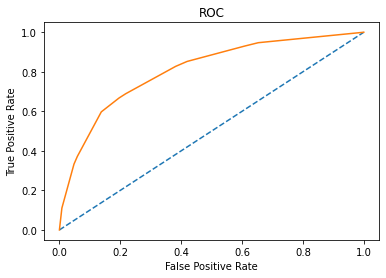

In [351]:
#AUC ROC curve for training set

# predict probabilities
probs = best_grid_cart.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

AUC: 0.800


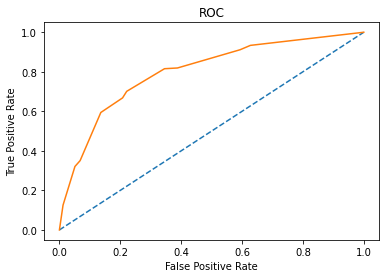

In [352]:
#AUC ROC curve for testing set

# predict probabilities
probs = best_grid_cart.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [359]:
#CART METRICS for training set
cart_metrics=classification_report(train_labels, ytrain_predict1,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.67
cart_train_recall  0.6
cart_train_f1  0.63


In [360]:
#CART METRICS for testing set
cart_metrics=classification_report(test_labels, ytest_predict1,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.67
cart_test_recall  0.59
cart_test_f1  0.63


<b> RF Model evaluation

In [370]:
#Accuracy score of training and testing data
rf_train_acc = accuracy_score(train_labels, ytrain_predict2)
rf_test_acc = accuracy_score(test_labels, ytest_predict2)
print('Accuracy of training data for RF: ', accuracy_score(train_labels, ytrain_predict2))
print('Accuracy of testing data for RF: ', accuracy_score(test_labels, ytest_predict2))

Accuracy of training data for RF:  0.7657342657342657
Accuracy of testing data for RF:  0.7729918509895227


In [307]:
#Confusion Matrix

print('Confusion matrix for train data : \n',confusion_matrix(train_labels, ytrain_predict2))
print('Confusion matrix for test data : \n',confusion_matrix(test_labels, ytest_predict2))

Confusion matrix for train data : 
 [[1198  161]
 [ 308  335]]
Confusion matrix for test data : 
 [[524  64]
 [131 140]]


In [308]:
#Classification report

print('Classification report for train data : \n',classification_report(train_labels, ytrain_predict2))
print('Classification report for test data : \n',classification_report(test_labels, ytest_predict2))

Classification report for train data : 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84      1359
           1       0.68      0.52      0.59       643

    accuracy                           0.77      2002
   macro avg       0.74      0.70      0.71      2002
weighted avg       0.76      0.77      0.76      2002

Classification report for test data : 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       588
           1       0.69      0.52      0.59       271

    accuracy                           0.77       859
   macro avg       0.74      0.70      0.72       859
weighted avg       0.76      0.77      0.76       859



Area under Curve is 0.8106637736786151


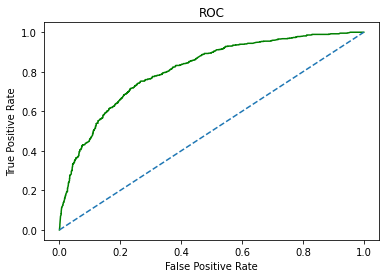

In [353]:
#AUC ROC for training set
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

Area under Curve is 0.8163673218364836


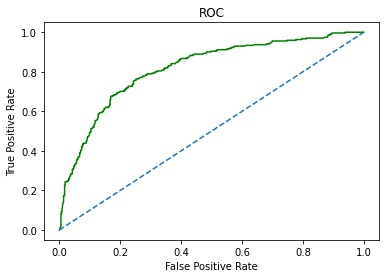

In [354]:
#AUC ROC for testing set
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is',rf_test_auc*100)

In [361]:
#RF METRICS for training set
rf_metrics=classification_report(train_labels, ytrain_predict2,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.68
rf_train_recall  0.52
rf_train_f1  0.59


In [362]:
#RF METRICS for testing set
rf_metrics=classification_report(test_labels, ytest_predict2,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.69
rf_test_recall  0.52
rf_test_f1  0.59


<b> NN Model evaluation

In [369]:
#Accuracy score of training and testing data
nn_train_acc = accuracy_score(train_labels1, ytrain_predict3)
nn_test_acc = accuracy_score(test_labels1, ytest_predict3)
print('Accuracy of training data for NN: ', accuracy_score(train_labels1, ytrain_predict3))
print('Accuracy of testing data for NN: ', accuracy_score(test_labels1, ytest_predict3))

Accuracy of training data for NN:  0.7747252747252747
Accuracy of testing data for NN:  0.7566938300349243


In [349]:
#Confusion Matrix

print('Confusion matrix for train data : \n',confusion_matrix(train_labels1, ytrain_predict3))
print('Confusion matrix for test data : \n',confusion_matrix(test_labels1, ytest_predict3))

Confusion matrix for train data : 
 [[1174  185]
 [ 266  377]]
Confusion matrix for test data : 
 [[502  86]
 [123 148]]


In [350]:
#Classification report

print('Classification report for train data : \n',classification_report(train_labels1, ytrain_predict3))
print('Classification report for test data : \n',classification_report(test_labels1, ytest_predict3))

Classification report for train data : 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1359
           1       0.67      0.59      0.63       643

    accuracy                           0.77      2002
   macro avg       0.74      0.73      0.73      2002
weighted avg       0.77      0.77      0.77      2002

Classification report for test data : 
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       588
           1       0.63      0.55      0.59       271

    accuracy                           0.76       859
   macro avg       0.72      0.70      0.71       859
weighted avg       0.75      0.76      0.75       859



Area under Curve is 0.822892026773872


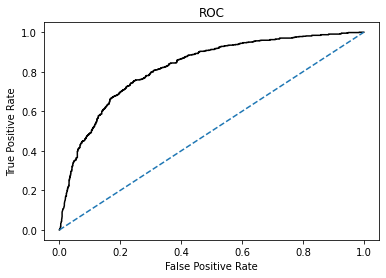

In [355]:
#AUC ROC for training set

nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels1,best_grid_nncl.predict_proba(X_train1)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels1,best_grid_nncl.predict_proba(X_train1)[:,1])
print('Area under Curve is', nn_train_auc)

Area under Curve is 0.8122411326154079


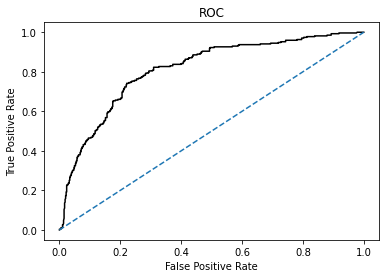

In [356]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels1,best_grid_nncl.predict_proba(X_test1)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels1,best_grid_nncl.predict_proba(X_test1)[:,1])
print('Area under Curve is', nn_test_auc)

In [364]:
#ANN METRICS for training set
nn_metrics=classification_report(train_labels1, ytrain_predict3,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.59
nn_train_f1  0.63


In [365]:
#ANN METRICS for testing set
nn_metrics=classification_report(test_labels1, ytest_predict3,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.63
nn_test_recall  0.55
nn_test_f1  0.59


<b>2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

In [372]:
#COmparison of the performance metrics from three models

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.78,0.77,0.77,0.77,0.76
AUC,0.81,0.80,0.81,0.82,0.82,0.81
Recall,0.60,0.59,0.52,0.52,0.59,0.55
Precision,0.67,0.67,0.68,0.69,0.67,0.63
F1 Score,0.63,0.63,0.59,0.59,0.63,0.59


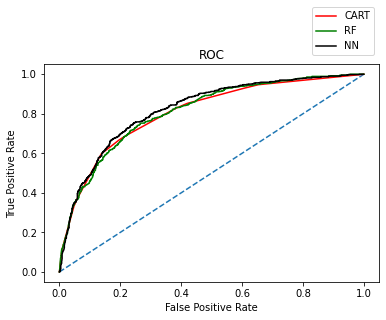

In [374]:
# ROC curve for three models on training set
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

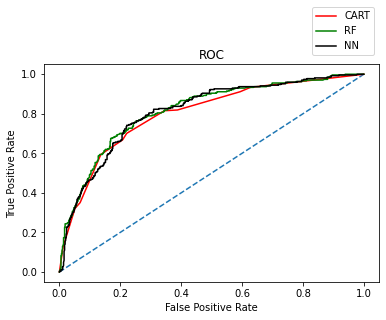

In [376]:
#ROC curve for all models on testing set
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

<b>2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

The goal of the business problem is to predict the chances of customers claiming for a particular insurance. Knowing whether a particular person is going to claim for insurance or not helps the insurer to plan in advance their expenses and also to make sure that they are solvent enough to pay the claim amount. This would also help them to change their underwriting guidelines and premium amount accordingly when they are facing higher claims.
Using the dataset given by the insurance firm, models were built and evaluated how different variables like Agency code, sales, commission, age, type, channel, etc. Here the target variable to predict is ‘Claimed’.  

    Insights from the models:
        
    
    •	In this case study, 68% of the data points are in ‘No’ claimed category and 32% of the data points are in ‘Yes’ claimed category, the classifier might easily classify all the ‘No’ stances which could be the majority while calculating accuracy.
    •	CART model performed consistently with both training and testing set.
    Our business problem is to identify the claim status, we are focused on determining the false positives and false negatives.
    •	False positive (FP) - Datapoints that are actually false but predicted as true.  This is also known as type 1 error. In order to reduce the type 1 error, we have to increase the precision of the model (among the points identified as positives by the model how many are actually positive). 
    Type 1 error in this case study will lead to insurer charging higher premium for customers who is not going to claim. This type of error is of less priority in this business context, since tagging the actual negative as positive does not affect the insurance firm drastically.
    •	False negative (FN) – Datapoints that are actually true but predicted as false. This is known as type 2 error. In order to reduce to type 2 error. We have to increase recall (how many actual true data points are identified as true by the model)
    Type 2 error is very important for our case study, since predicting the actual true data points are false will lead to higher insurance claims for which the firm might not be ready.



    Recommendations for the business:
    
    If the claim status comes out as Yes:
    
    •	Can charge additional premium/interest rates for the particular customer is order to compensate for the expenses incurred when they claim.
    •	Penalty fees can be charged if they claim within a certain period of policy issuance in order to reduce higher first year claim, if any.
    •	Based on the product name (Customized, cancellation, silver, gold and bronze plan) charge premium accordingly.
    •	Regular internal audits for all claims and this should apply to all stages in claim processing department.
    
    If the claim status comes out as No:
    
    •	Underwriting guidelines to be modified in order to determine if the insurance is really necessary for the customer, if not, we can recommend some other plan which might be even more useful for the customers.
    
    Here we have built model with 9 independent variables for predicting the ‘Claimed’ dependent variable.  If we had some more factors like claim frequency, amount those of which can affect the claim status predominantly could make the model better in predicting ‘Yes’ stances.





